## データの取り込み

In [25]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font="IPAexGothic", style="white")
pd.set_option('display.max_columns', 30)
plt.rcParams["figure.figsize"] = [10, 5]

In [26]:
#データの取り込み
df_train_master = pd.read_csv("sales_amount_predict_train.csv")
df_submit_master = pd.read_csv("sales_amount_predict_test.csv")
display(df_train_master)
display(df_submit_master)

,sales_date,category_id,sales_amount
0,2019-01-01,B,97820
1,2019-01-01,T,12000
2,2019-01-01,A,18000
3,2019-01-02,T,28100
4,2019-01-02,B,56700
...,...,...,...
3676,2022-07-30,A,57209
3677,2022-07-30,T,24600
3678,2022-07-31,A,78260
3679,2022-07-31,T,51790


,sales_month,category_id
0,202208,A
1,202208,B
2,202208,T
3,202209,A
4,202209,B
5,202209,T
6,202210,A
7,202210,B
8,202210,T
9,202211,A


## 前処理

In [27]:
#trainデータのサマリ
display(df_train_master.info())
display(df_train_master.describe())
display(df_train_master.describe(include="object"))

#2019年1月~2022年7月末までの売上データが日付×3種類のカテゴリーごとに格納されたデータ
#売上の最小値が0ではないため、売上がなかった日のデータは入っていない様子(月ごとで集計した後に欠損月がないか確認が必要)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3681 entries, 0 to 3680
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sales_date    3681 non-null   object
 1   category_id   3681 non-null   object
 2   sales_amount  3681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 86.4+ KB


None

,sales_amount
count,3.681000e+03
mean,1.515820e+05
std,1.640288e+05
min,3.160000e+03
25%,3.900000e+04
50%,7.815000e+04
75%,2.272000e+05
max,2.592858e+06


,sales_date,category_id
count,3681,3681
unique,1308,3
top,2019-01-01,B
freq,3,1308


In [28]:
# 事前準備(月×カテゴリーごとにデータを集計)
df_train = df_train_master.copy()
df_train["sales_date"] = pd.to_datetime(df_train["sales_date"])
df_train["sales_month"] = df_train["sales_date"].dt.strftime("%Y-%m-01")
df_train["sales_month"] = pd.to_datetime(df_train["sales_month"])
df_train = df_train[["sales_month", "category_id", "sales_amount"]].groupby(["sales_month", "category_id"], as_index=False).sum()
df_train = df_train.pivot(index="sales_month", columns="category_id", values="sales_amount") #カテゴリーごとの横持ちデータに変換
df_train

category_id,A,B,T
sales_month,,,
2019-01-01,319860,2521630,391800
2019-02-01,398660,1830220,128500
2019-03-01,1605500,4708420,358000
2019-04-01,1671230,5740700,328300
2019-05-01,2052890,5735460,323500
2019-06-01,1734690,5162859,36900
2019-07-01,1485871,5476388,95430
2019-08-01,1395551,4855479,240580
2019-09-01,1263810,6246224,1234050


In [29]:
#再度確認
display(df_train.info())
display(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43 entries, 2019-01-01 to 2022-07-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       43 non-null     int64
 1   B       43 non-null     int64
 2   T       43 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


None

category_id,A,B,T
count,4.300000e+01,4.300000e+01,4.300000e+01
mean,1.600713e+06,9.487136e+06,1.888276e+06
std,5.136201e+05,3.727972e+06,1.983936e+06
min,3.198600e+05,1.830220e+06,3.690000e+04
25%,1.376112e+06,6.282163e+06,3.776500e+05
50%,1.563835e+06,9.433975e+06,1.234050e+06
75%,2.000265e+06,1.239408e+07,3.054505e+06
max,2.558207e+06,1.752509e+07,8.767060e+06


## EDA

<Axes: xlabel='sales_month'>

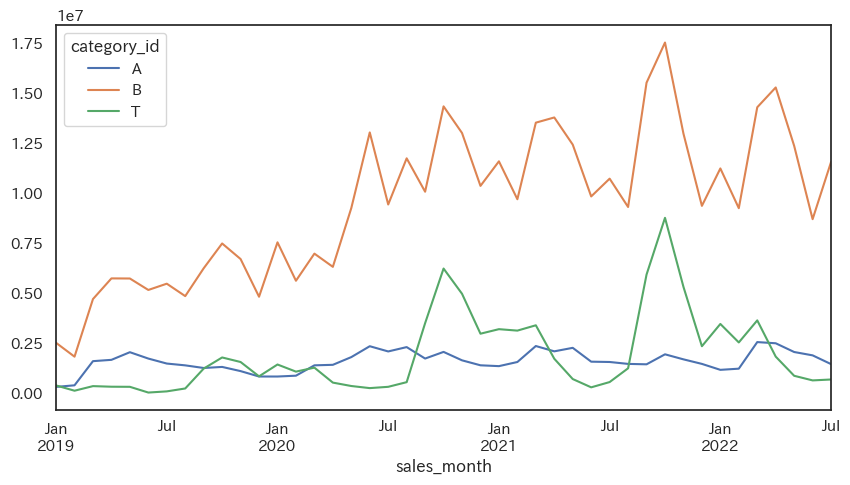

In [30]:
#売上の推移
df_train.plot()

#トレンド：BとTは上昇傾向
#季節成分：Tは1年ごとに山があり、Bは半年ごと、Aはあまりない

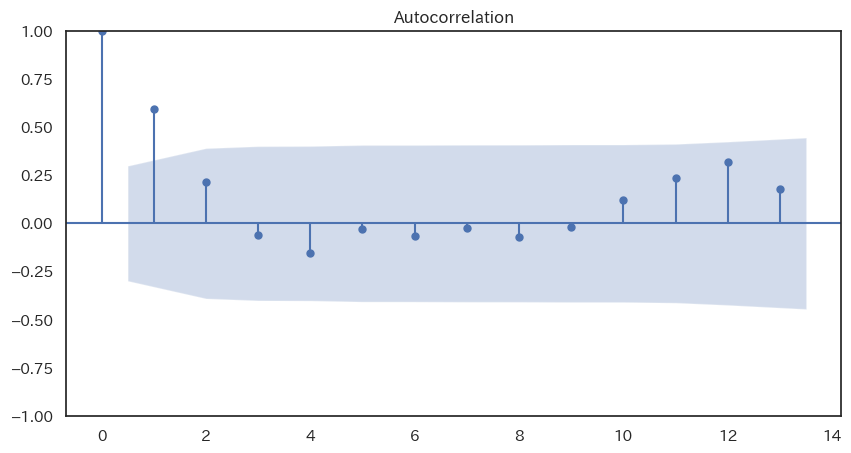

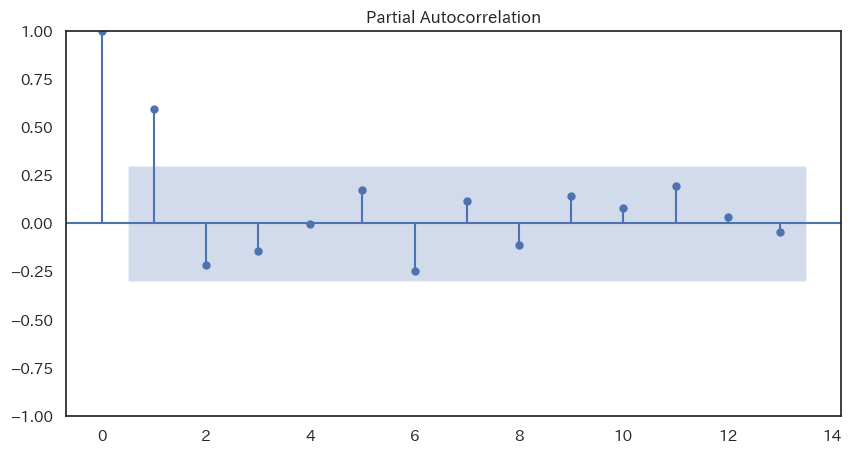

In [31]:
#コレログラム(A)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df_train["A"], lags=13)
pacf = plot_pacf(df_train["A"], lags=13)

#先月との相関が一番強く、有意ではないが前年同月の相関も少しある
#多少ではあるが1年ごとの周期性がみられる

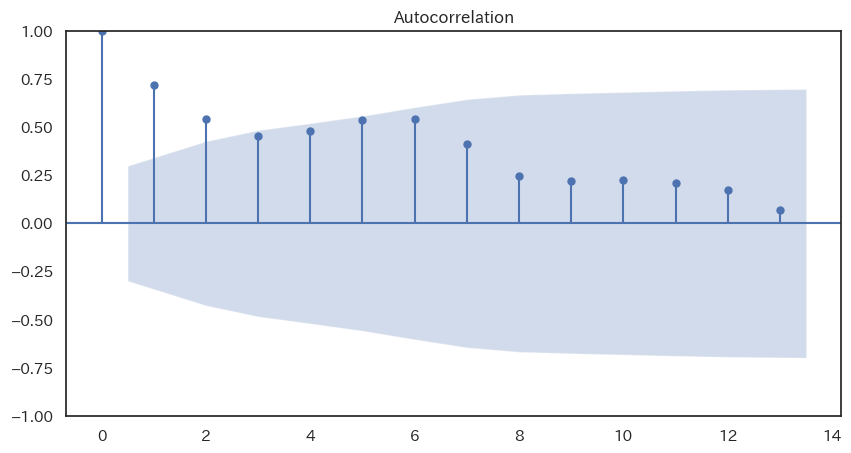

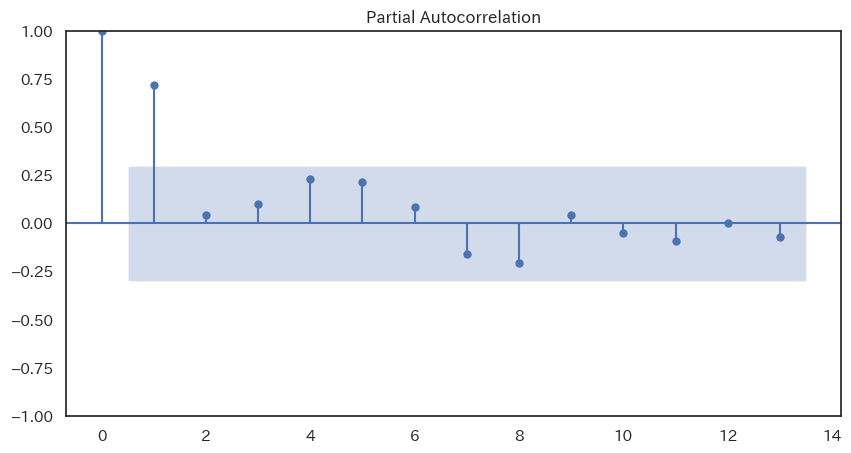

In [32]:
#コレログラム(B)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df_train["B"], lags=13)
pacf = plot_pacf(df_train["B"], lags=13)

#先月との相関が一番強く、4~6ヶ月前までの数値にも多少は影響を受ける
#半年ごとの周期が多少ありそう

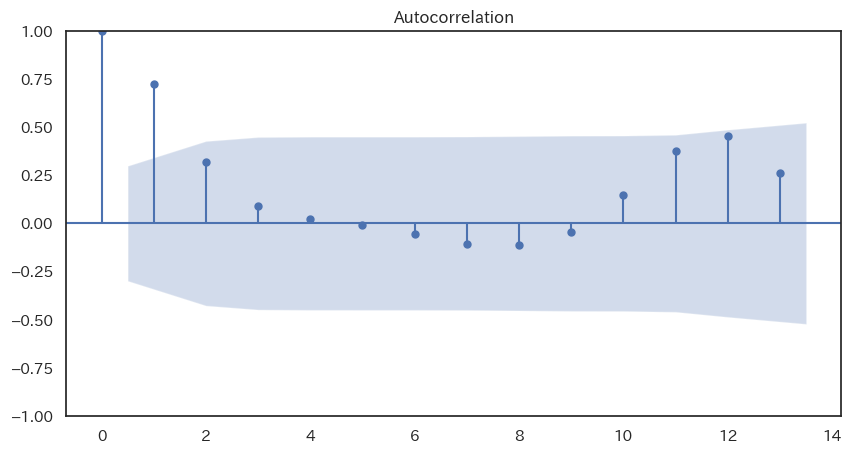

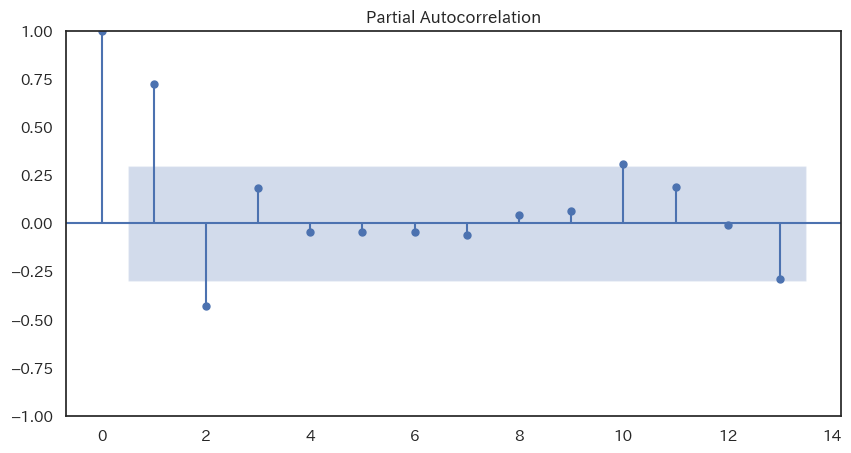

In [33]:
#コレログラム(T)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df_train["T"], lags=13)
pacf = plot_pacf(df_train["T"], lags=13)

#先月と前年同月の影響を強く受ける

## 予測と評価

In [34]:
#バリデーションデータの作成(train_test_splitを使うときはshuffle=Falseにするのを忘れずに)
train = df_train[:"2021-07-01"]
val = df_train["2021-08-01":]
val

#データ数が少ないためバリデーションの結果はあまり当てにならないが、一応やっておく

category_id,A,B,T
sales_month,,,
2021-08-01,1468620,9308350,1248760
2021-09-01,1447800,15519402,5932180
2021-10-01,1947640,17525090,8767060
2021-11-01,1695780,12975760,5318542
2021-12-01,1468630,9364876,2351600
2022-01-01,1171449,11235290,3464360
2022-02-01,1230088,9248900,2540929
2022-03-01,2558207,14291407,3642792
2022-04-01,2499188,15281065,1832481


In [35]:
from pmdarima import auto_arima
#categoryA
arima_model = auto_arima(train["A"], seasonal=True, m=12)
pred_A = arima_model.predict(n_periods=12)
val["pred_A"] = pred_A
#categoryB
arima_model = auto_arima(train["B"], seasonal=True, m=6)
pred_B = arima_model.predict(n_periods=12)
val["pred_B"] = pred_B
#categoryT
arima_model = auto_arima(train["T"]*0.1, seasonal=True, m=12) #バグエラー回避のため0.1を掛けて後で戻す処理を行う(本来はしなくて良い)
pred_T = arima_model.predict(n_periods=12)
val["pred_T"] = pred_T*10
#ベースラインモデル(前年同月の値)
val["base_A"] = train["2020-08-01":"2021-07-01"]["A"].values
val["base_B"] = train["2020-08-01":"2021-07-01"]["B"].values
val["base_T"] = train["2020-08-01":"2021-07-01"]["T"].values
#ensembleモデル
val["ensemble_A"] = (val["pred_A"] + val["base_A"]) / 2
val["ensemble_B"] = (val["pred_B"] + val["base_B"]) / 2
val["ensemble_T"] = (val["pred_T"] + val["base_T"]) / 2
val

/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_87408/1127924530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["pred_A"] = pred_A
/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_87408/1127924530.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val["pred_B"] = pred_B
/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_87408/1127924530.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

category_id,A,B,T,pred_A,pred_B,pred_T,base_A,base_B,base_T,ensemble_A,ensemble_B,ensemble_T
sales_month,,,,,,,,,,,,
2021-08-01,1468620,9308350,1248760,1.458196e+06,1.197390e+07,1.195681e+06,2308095,11739818,556020,1.883146e+06,1.185686e+07,8.758505e+05
2021-09-01,1447800,15519402,5932180,1.593522e+06,1.233996e+07,6.264303e+06,1735470,10071975,3504000,1.664496e+06,1.120597e+07,4.884151e+06
2021-10-01,1947640,17525090,8767060,1.897469e+06,1.270601e+07,1.124032e+07,2067893,14336559,6232650,1.982681e+06,1.352129e+07,8.736483e+06
2021-11-01,1695780,12975760,5318542,1.710854e+06,1.307207e+07,8.982719e+06,1646676,13005985,4972450,1.678765e+06,1.303903e+07,6.977584e+06
2021-12-01,1468630,9364876,2351600,1.590469e+06,1.343812e+07,5.725996e+06,1398366,10362996,2977450,1.494418e+06,1.190056e+07,4.351723e+06
2022-01-01,1171449,11235290,3464360,1.621201e+06,1.380418e+07,5.595008e+06,1356674,11590140,3203790,1.488937e+06,1.269716e+07,4.399399e+06
2022-02-01,1230088,9248900,2540929,1.737193e+06,1.417024e+07,5.809183e+06,1563246,9695770,3131560,1.650220e+06,1.193300e+07,4.470371e+06
2022-03-01,2558207,14291407,3642792,2.421913e+06,1.453629e+07,6.144313e+06,2361846,13521838,3397720,2.391879e+06,1.402907e+07,4.771016e+06
2022-04-01,2499188,15281065,1832481,2.334149e+06,1.490235e+07,3.549736e+06,2095993,13781686,1726080,2.215071e+06,1.434202e+07,2.637908e+06


In [36]:
#検証
from sklearn.metrics import mean_squared_error
print("pred_A", np.sqrt(mean_squared_error(val["A"], val["pred_A"])))
print("base_A", np.sqrt(mean_squared_error(val["A"], val["base_A"])))
print("ensemble_A", np.sqrt(mean_squared_error(val["A"], val["ensemble_A"])))
print("pred_B", np.sqrt(mean_squared_error(val["B"], val["pred_B"])))
print("base_B", np.sqrt(mean_squared_error(val["B"], val["base_B"])))
print("ensemble_B", np.sqrt(mean_squared_error(val["B"], val["ensemble_B"])))
print("pred_T", np.sqrt(mean_squared_error(val["T"], val["pred_T"])))
print("base_T", np.sqrt(mean_squared_error(val["T"], val["base_T"])))
print("ensemble_T", np.sqrt(mean_squared_error(val["T"], val["ensemble_T"])))

#スコアではベースラインに惨敗、以下グラフ化して精査

pred_A 375304.5485307056
base_A 330412.2668660825
ensemble_A 281581.59354206646
pred_B 3700344.572451111
base_B 2079778.8383102382
ensemble_B 2575376.441092092
pred_T 2175528.410618708
base_T 1078654.6814694297
ensemble_T 1107226.3299935427


<Axes: xlabel='sales_month'>

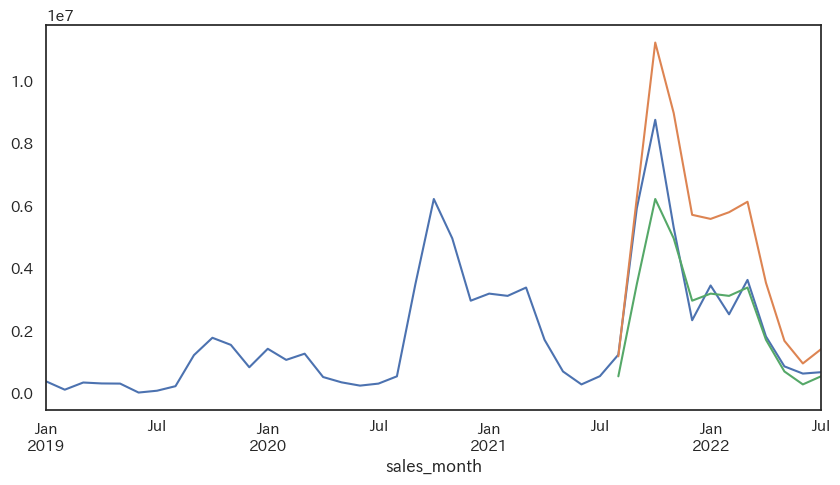

In [37]:
#カテゴリーTの精査
df_train["T"].plot()
val["pred_T"].plot()
val["base_T"].plot()

#2019年1月~2020年6月までの売上が低く、上昇トレンドを考慮したことがスコアが悪い原因
#ARIMAモデルは同じトレンド、周期性であることを仮定したモデルであるため、トレンドの変わるデータだと裏目に出てしまうことがある
#2020年6月以降のデータを使って予測するのが望ましいが、データ数不足で交差検証できないため、このまま進める

<Axes: xlabel='sales_month'>

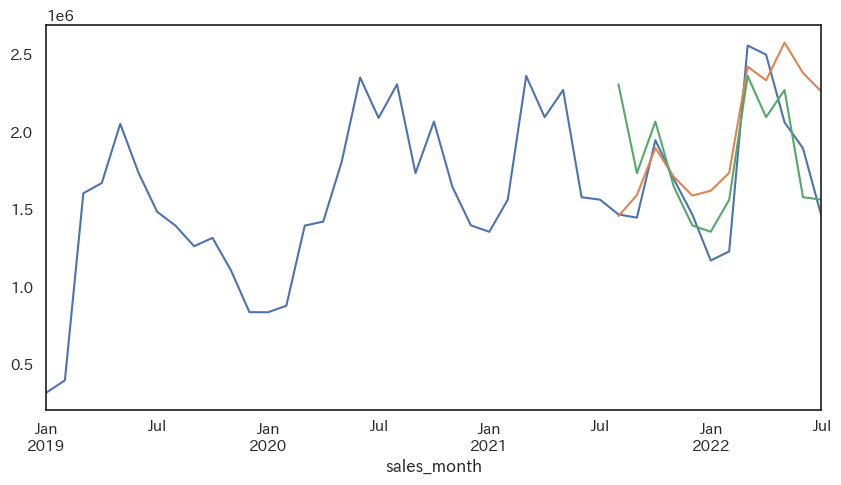

In [38]:
#カテゴリーAの精査
df_train["A"].plot()
val["pred_A"].plot()
val["base_A"].plot()

#他のカテゴリーよりはよいが、それでも最後の方が少し高めにですぎてしまっている

<Axes: xlabel='sales_month'>

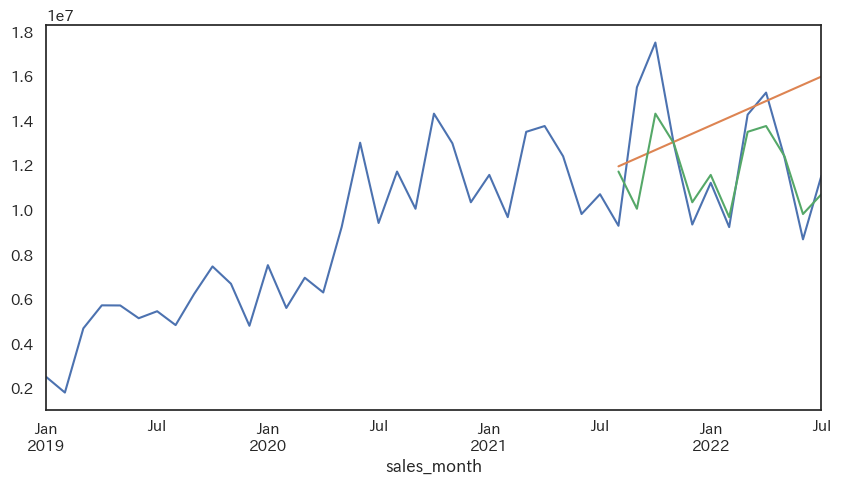

In [39]:
#カテゴリーBの精査
df_train["B"].plot()
val["pred_B"].plot()
val["base_B"].plot()

#計算過程で周期性を考慮しないほうがスコアが良いと判断されたため、トレンド成分だけを使った予測になっている

<Axes: xlabel='sales_month'>

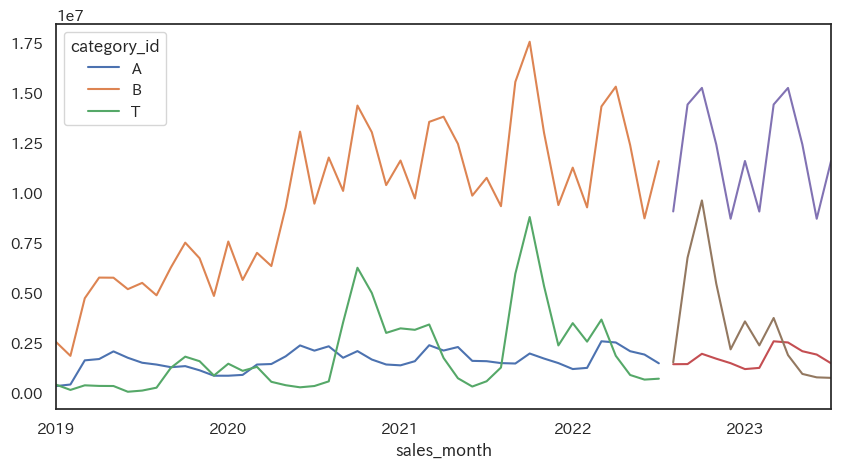

In [40]:
#売上が少ない2019年のデータは使わず、2020年1月以降を使用
submit_train = df_train["2020-01-01":]
arima_model = auto_arima(submit_train["A"], seasonal=True, m=12)
submit_pred_A = arima_model.predict(n_periods=12)
arima_model = auto_arima(submit_train["B"], seasonal=True, m=6)
submit_pred_B = arima_model.predict(n_periods=12)
arima_model = auto_arima(submit_train["T"], seasonal=True, m=12)
submit_pred_T = arima_model.predict(n_periods=12)
df_train.plot()
submit_pred_A.plot()
submit_pred_B.plot()
submit_pred_T.plot()

#違和感はなく、モデル自体はうまくできているのが分かる

In [41]:
#サブミットデータ作成
submit_A = pd.DataFrame(submit_pred_A).reset_index()
submit_A.columns = ["sales_month", "sales_amount"]
submit_A["sales_month"] = submit_A["sales_month"].dt.strftime("%Y%m")
submit_A["category_id"]="A"
submit_B = pd.DataFrame(submit_pred_B).reset_index()
submit_B.columns = ["sales_month", "sales_amount"]
submit_B["sales_month"] = submit_B["sales_month"].dt.strftime("%Y%m")
submit_B["category_id"]="B"
submit_T = pd.DataFrame(submit_pred_T).reset_index()
submit_T.columns = ["sales_month", "sales_amount"]
submit_T["sales_month"] = submit_T["sales_month"].dt.strftime("%Y%m")
submit_T["category_id"]="T"
df_submit = pd.concat([submit_A, submit_B, submit_T], ignore_index=True, axis=0).sort_values(["sales_month", "category_id"], ascending=True)[["sales_month", "category_id", "sales_amount"]]
df_submit.to_csv("sales_amount_predict_submit.csv", index=False)
df_submit

#score=1778592

,sales_month,category_id,sales_amount
0,202208,A,1.413644e+06
12,202208,B,9.046081e+06
24,202208,T,1.504547e+06
1,202209,A,1.419339e+06
13,202209,B,1.438737e+07
25,202209,T,6.734981e+06
2,202210,A,1.932906e+06
14,202210,B,1.521898e+07
26,202210,T,9.596481e+06
3,202211,A,1.688152e+06


In [42]:
#前年同月比モデルでのサブミット
df_submit_baseline = df_train["2021-08-01":].reset_index().melt(id_vars=["sales_month"], var_name="category_id", value_name="sales_amount").sort_values(["sales_month", "category_id"], ascending=True)
df_submit_baseline.to_csv("sales_amount_predict_submit_baseline.csv", index=False)
#score=1931164

#アンサンブルモデルのサブミット
df_submit_ensemble = df_submit.copy()
df_submit_ensemble["sales_amount"] = (df_submit["sales_amount"] + df_submit_baseline["sales_amount"]) / 2
df_submit_ensemble.to_csv("sales_amount_predict_submit_ensemble.csv", index=False)
#score=1839217

#最終スコアだけで判断するならアンサンブルよりもARIMAモデルのみでの予測の方が良いという結果に